In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

In [43]:
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/Final project/images_compressed/"
print(os.listdir(DATASET_PATH))

['images.csv', 'images']


In [44]:
# what is inside the main directory
list_directory = os.listdir(DATASET_PATH)
print(list_directory)

# each time directory files gets reordered. That's why needed to find where images folder is.
index=0
for i in range (len(list_directory)):
    if list_directory[i]=="images":
        index=i
        break

['images.csv', 'images']


In [45]:
df = pd.read_csv(DATASET_PATH + "images.csv", nrows=5000, error_bad_lines=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
df['image_id'] = df.apply(lambda row: str(row['image']) + ".jpg", axis=1)


In [47]:
# df['path'] = df.apply(lambda row: str( "/content/drive/MyDrive/Colab Notebooks/Final project/images_compressed/images/" + row['image'] + ".jpg"), axis=1)

In [48]:
# df.drop(df[df['label'] == 'Not sure'].index, inplace = True)

In [49]:
df = df.reset_index(drop=True)

In [50]:
df.columns

Index(['image', 'sender_id', 'label', 'kids', 'image_id'], dtype='object')

In [51]:
df.head()

,image,sender_id,label,kids,image_id
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False,4285fab0-751a-4b74-8e9b-43af05deee22.jpg
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False,00627a3f-0477-401c-95eb-92642cbe078d.jpg
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg


In [52]:
# shortDataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final project/shortDataframe.csv')

In [53]:
# shortDataframe.head()

In [54]:
shortDataframe = pd.DataFrame({
    'filename': df['image_id'],
    'type': df['label']
})

# total number of entries in the dataframe
total_row = len(shortDataframe)
print('total row count: ', total_row)



total row count:  5000


In [55]:
unique_types = shortDataframe['type'].unique().tolist()
total_class = len(unique_types)
print(total_class)
print(unique_types)
print(unique_types[0])
print(unique_types.index(unique_types[0]))
shortDataframe['number_types'] = shortDataframe['type'].apply(lambda x: unique_types.index(x) if x in unique_types else 0)
shortDataframe.head(10)

20
['Not sure', 'T-Shirt', 'Shoes', 'Shorts', 'Shirt', 'Pants', 'Skirt', 'Other', 'Top', 'Outwear', 'Dress', 'Body', 'Longsleeve', 'Undershirt', 'Hat', 'Polo', 'Blouse', 'Hoodie', 'Skip', 'Blazer']
Not sure
0


,filename,type,number_types
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,Not sure,0
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,T-Shirt,1
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,Not sure,0
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,T-Shirt,1
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,Shoes,2
5,5d3a1404-697f-479f-9090-c1ecd0413d27.jpg,Shorts,3
6,b0c03127-9dfb-4573-8934-1958396937bf.jpg,Shirt,4
7,4c8f245e-a039-46fd-a6b9-1bb51e83fc05.jpg,T-Shirt,1
8,c995c900-693d-4dd6-8995-43f3051ec488.jpg,Pants,5
9,bf78527f-0734-44fd-a968-f6c32c12d61e.jpg,Shoes,2


In [56]:
df


,image,sender_id,label,kids,image_id
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False,4285fab0-751a-4b74-8e9b-43af05deee22.jpg
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False,00627a3f-0477-401c-95eb-92642cbe078d.jpg
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg
...,...,...,...,...,...
4995,2fdb6ac9-dfe4-4824-baab-6bf4e1d2f802,204,Skirt,False,2fdb6ac9-dfe4-4824-baab-6bf4e1d2f802.jpg
4996,cc34d80f-6e80-446b-b9a7-3927f857d0a4,227,Shoes,False,cc34d80f-6e80-446b-b9a7-3927f857d0a4.jpg
4997,40cdc4d8-61b5-4b1b-bfca-4a34541abddb,204,Skirt,True,40cdc4d8-61b5-4b1b-bfca-4a34541abddb.jpg
4998,c0832183-181f-4e80-857e-038136011b09,204,Longsleeve,False,c0832183-181f-4e80-857e-038136011b09.jpg


In [57]:
from tensorflow import keras

In [58]:
from keras import models

In [59]:
model = models.load_model('/content/drive/MyDrive/Colab Notebooks/Final project/my_model_2')

In [61]:
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Final project/my_model')

In [62]:
# import cv2
# import tensorflow as tf

# CATEGORIES = ['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks', 'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra', 'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant', 'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas', 'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees', 'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests', 'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket', 'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring', 'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers', 'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta', 'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics', 'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser', 'Necklace and Chains', 'Duffel Bag', 'Sports Sandals', 'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag', 'Tracksuits', 'Swimwear', 'Shoe Laces', 'Fragrance Gift Set', 'Bangle', 'Nightdress', 'Ties', 'Baby Dolls', 'Leggings', 'Highlighter and Blush', 'Travel Accessory', 'Kurtis', 'Mobile Pouch', 'Messenger Bag', 'Lip Care', 'Face Moisturisers', 'Compact', 'Eye Cream', 'Accessory Gift Set', 'Beauty Accessory', 'Jumpsuit', 'Kajal and Eyeliner', 'Water Bottle', 'Suspenders', 'Lip Liner', 'Robe', 'Salwar and Dupatta', 'Patiala', 'Stockings', 'Eyeshadow', 'Headband', 'Tights', 'Nail Essentials', 'Churidar', 'Lounge Tshirts', 'Face Scrub and Exfoliator', 'Lounge Shorts', 'Gloves', 'Mask and Peel', 'Wristbands', 'Tablet Sleeve', 'Ties and Cufflinks', 'Footballs', 'Stoles', 'Shapewear', 'Nehru Jackets', 'Salwar', 'Cufflinks', 'Jeggings', 'Hair Colour', 'Concealer', 'Rompers', 'Body Lotion', 'Sunscreen', 'Booties', 'Waist Pouch', 'Hair Accessory', 'Rucksacks', 'Basketballs', 'Lehenga Choli', 'Clothing Set', 'Mascara', 'Toner', 'Cushion Covers', 'Key chain', 'Makeup Remover', 'Lip Plumper', 'Umbrellas', 'Face Serum and Gel', 'Hat', 'Mens Grooming Kit', 'Rain Trousers', 'Body Wash and Scrub', 'Suits', 'Ipad']  # will use this to convert prediction num to string value


# def prepare(filepath):
#     IMG_SIZE = 150  # 50 in txt-based
#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
#     new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
#     return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.


In [63]:
# reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Final project/my_model")

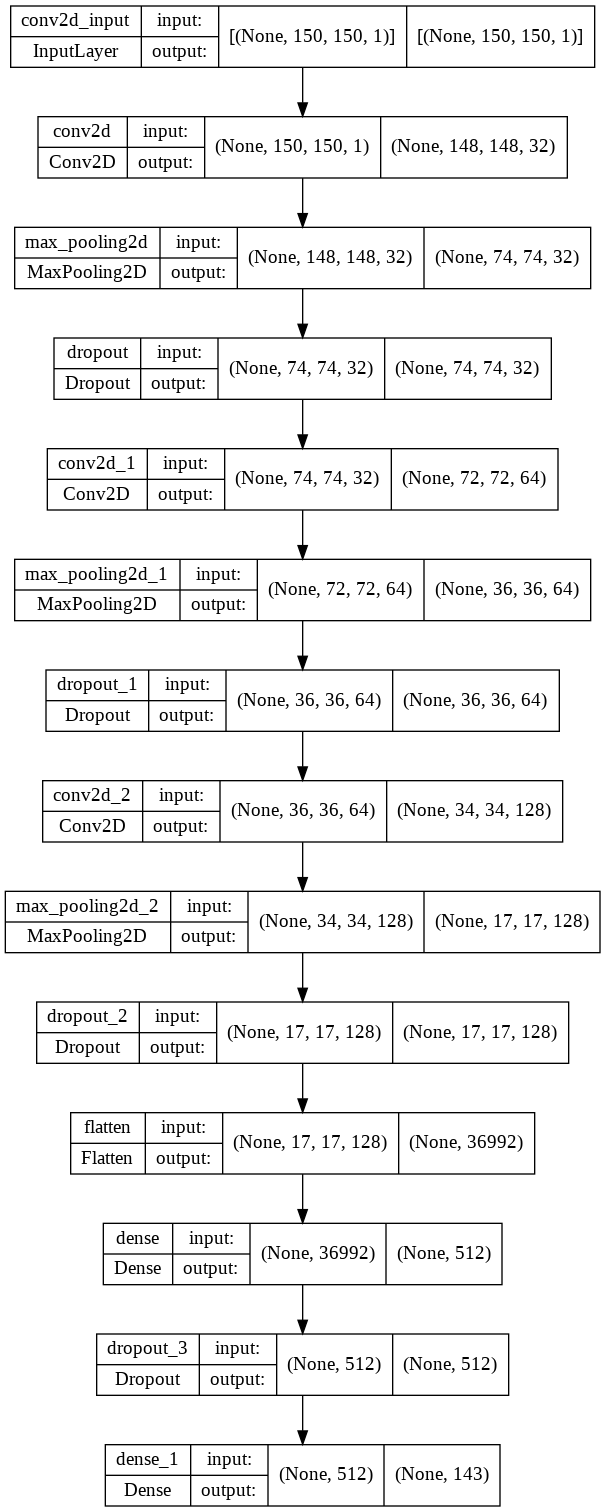

In [60]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [61]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [62]:
def load_image(i):
    Image_path=DATASET_PATH+list_directory[index]+"/"+shortDataframe.loc[i,'filename']
    print(Image_path)
    Image_id=shortDataframe.loc[i,'filename'].split(".")
    print(Image_id)
    res=Image_id[0]
    image = cv2.imread(Image_path,cv2.IMREAD_COLOR)
    resized_img = cv2.resize(image, dsize=(224, 224))
    return resized_img,res

/content/drive/MyDrive/Colab Notebooks/Final project/images_compressed/images/00627a3f-0477-401c-95eb-92642cbe078d.jpg
['00627a3f-0477-401c-95eb-92642cbe078d', 'jpg']


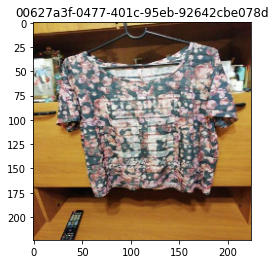

In [63]:
img,img_id = load_image(2)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title(img_id)
plt.imshow(img)

In [64]:
def make_prediction(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    resized_img = cv2.resize(img, dsize=(150, 150))
    x_data = np.array(resized_img).reshape(-1, 150,150,1)
    x_data=x_data/255
#     print(x_data)
#     print(x_data.shape)
    result=model.predict(x_data)
#     print(type(result))
#     print(np.argmax(result))
    return x_data,unique_types[np.argmax(result)]

In [65]:
numpy_image,result=make_prediction(img)
print(result)

Shirt


In [66]:
typeList=[]
for i, row in df.iterrows(): 
    if(row["label"]==result):
        #print(row["id"],row["articleType"])
        if(img_id!=str(row["image"])):
            typeList.append(row['image'])

In [67]:
print(typeList)

['b0c03127-9dfb-4573-8934-1958396937bf', 'd8445328-a318-434b-9c4e-fa29cf04be41', '09f4ffb6-ed86-42b6-ac23-6f8f2359460f', 'b951618d-f10d-4c12-82a4-9b18ee12aa2c', 'c6d71611-6bae-4645-8a93-959973e05f8b', 'bc492f26-f7d2-4065-92fb-65b6df7b4ea5', '6bedb1ea-9f80-4d65-bca8-7709d34ffb5e', 'e1b266de-a3b0-4ff6-92c3-7302bc57b9cb', 'ef4afaa2-ce6f-4063-83ad-beac8d201e67', 'ab3bd520-3337-4ed6-a7eb-d11455385fd3', 'c7c0ee49-32c3-4273-b37b-980972e352eb', '52242d70-6914-4819-94cd-844e380ffbcb', '10cb59c5-1b8d-487a-820f-bb7caa7d8a80', '2a774d80-c007-43a7-9c38-85e441274cfc', '111f6233-f984-46a9-ab6a-13d3c5a3585c', 'f53dc5e8-9625-4fb4-85f0-3c773c884545', '4998118e-5c47-42ba-8b8f-42c18aa42230', 'bd1b88bb-457c-463c-8504-cfcd97bc5d51', '9b771b16-2700-41ea-8b87-179324fbe107', 'f27fed74-1495-44df-b129-8b346c3c57eb', 'b4b507dd-f68c-4fd1-9f25-6e2c2930a569', '54c2556e-de9f-49ca-b266-e01b642e6922', '8388e858-234a-4a99-9d7b-146250e964ca', '1ea48561-8057-4069-af45-ba753a997e52', 'bb2ba16e-a2e0-4f5b-b9bd-e541cd3ad37a',

In [68]:
i=0
X_similar=[]
X_id_similar=[]
X_numpy=[]
for imageId in typeList:
#     print(imageId)
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(imageId)+".jpg"
    image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
    try:
        resized_img = cv2.resize(image, dsize=(150,150))
    except:
        print("can't read file: ", str(imageId)+".jpg")
    X_similar.append(resized_img)
    X_id_similar.append(imageId)
        
X_numpy = np.array(X_similar).reshape(-1, 150,150,1)
X_numpy = X_numpy/255
#print(X_numpy[0])

Text(0.5, 1.0, 'b0c03127-9dfb-4573-8934-1958396937bf')

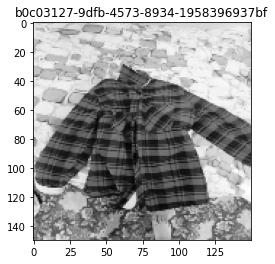

In [69]:
plt.imshow(X_similar[0], cmap='Greys_r')
plt.title(X_id_similar[0])

In [70]:
import math
def calculateDistance(i1, i2):
    return math.sqrt(np.sum((i1-i2)**2))

In [71]:
print(calculateDistance(numpy_image,X_numpy[0]))

51.12512667436829


In [72]:
distance_list=[]
for i in range (0, len(X_numpy)):
    distance_list.append(calculateDistance(numpy_image,X_numpy[i]))

sorted_distance_list=distance_list.copy()
#print(distance_list)
sorted_distance_list.sort()

least_ten_distance=sorted_distance_list[0:30]
print(least_ten_distance)
index_distance=[]
for i in range (0, len(least_ten_distance)-1):
    if(least_ten_distance[i]!=least_ten_distance[i+1]):
        index_distance.append(distance_list.index(least_ten_distance[i]))

index_distance=index_distance[0:15]

print(index_distance)

[30.950182590474302, 32.166326680049416, 33.12691218103115, 33.764686297277464, 33.903909491618215, 34.16051555173716, 34.17081410672926, 34.74860226652468, 35.140339281642, 35.30003654073192, 35.57845790175098, 35.76087139747153, 35.93213882498862, 35.952056374493885, 35.95479219647334, 36.1442775085723, 36.35997224557998, 36.431689987852764, 36.808273688377355, 36.896931998833814, 36.89962485574108, 37.02077972555264, 37.05906006771695, 37.15398840349193, 37.1600861553864, 37.162483097101166, 37.22317513857671, 37.229021764139894, 37.30736986458567, 37.37405074858677]
[352, 98, 340, 39, 270, 186, 229, 162, 34, 169, 201, 107, 282, 35, 74]


b0c03127-9dfb-4573-8934-1958396937bf
d8445328-a318-434b-9c4e-fa29cf04be41
09f4ffb6-ed86-42b6-ac23-6f8f2359460f
b951618d-f10d-4c12-82a4-9b18ee12aa2c
c6d71611-6bae-4645-8a93-959973e05f8b
bc492f26-f7d2-4065-92fb-65b6df7b4ea5
6bedb1ea-9f80-4d65-bca8-7709d34ffb5e
e1b266de-a3b0-4ff6-92c3-7302bc57b9cb
ef4afaa2-ce6f-4063-83ad-beac8d201e67
ab3bd520-3337-4ed6-a7eb-d11455385fd3
c7c0ee49-32c3-4273-b37b-980972e352eb
52242d70-6914-4819-94cd-844e380ffbcb
10cb59c5-1b8d-487a-820f-bb7caa7d8a80
2a774d80-c007-43a7-9c38-85e441274cfc
111f6233-f984-46a9-ab6a-13d3c5a3585c


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


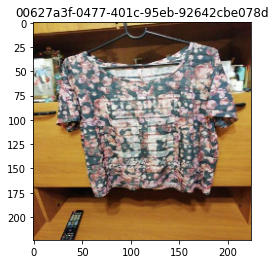

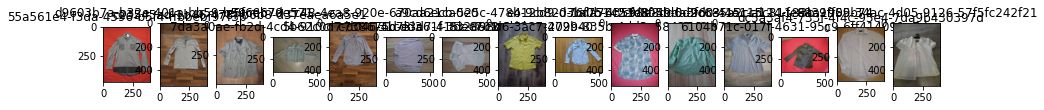

In [73]:
# Image_path=DATASET_PATH+list_directory[index]+"/"+str(img_id)+".jpg"
# src = cv2.imread(Image_path)
# image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.title(img_id)

fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
for i in range(0,len(index_distance)):
    print(X_id_similar[i])
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(X_id_similar[index_distance[i]])+".jpg"
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(1,15, i+1))
    subplot_title=str(X_id_similar[index_distance[i]])
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()